In [101]:
import os  # for os.path.basename
from collections import defaultdict

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd

from sklearn.manifold import MDS

from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import ward, dendrogram

In [102]:
def getVectors():
    f=open("cluster.txt","r")
    nextIsTopic=False;
    TopicCount=0
    thelist=[] #list of all characters with their position being the position in the vector list
    listcount=0
    dic= defaultdict(lambda: -1) # list of their positions in the vector list
    for line in f: #get number of topics and character positions
        line = line.strip('\n')
        if(dic[line]==-1):
            if(line!="*" and nextIsTopic==False):
                thelist.append(line)
                dic[line]=listcount
                listcount+=1
        if(nextIsTopic):
            nextIsTopic=False
            TopicCount+=1 
        if(line=="*"):
            nextIsTopic=True

    f.close()
    f=open("cluster.txt","r")
    currentTopic=-1
    vectors=[]
    for char in thelist:
        l=[]
        for i in range(TopicCount):
            l.append(0)
        vectors.append(l)
    nextIsTopic=False
    
    for line in f:
        line = line.strip('\n')
        if(nextIsTopic==False and line!="*"):
            vectors[dic[line]][currentTopic]=1
        if(nextIsTopic):
            nextIsTopic=False
            currentTopic+=1
        if(line=="*"):
            nextIsTopic=True
    return (vectors,thelist)

In [103]:

(topic_matrix, char_labels) = getVectors()

data = np.array(topic_matrix)

from sklearn.cluster import KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)
clusters = kmeans.labels_.tolist()
print clusters

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 0, 0, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 0, 3, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [104]:
dic={}
i=0
for name in char_labels:
    dic[str(name)]=clusters[i]
    i += 1
d=sorted(dic.items(), key=lambda x:x[1])
for name in d:
    print name

('House Elves', 0)
('Pets', 0)
('Fang', 0)
('Nearly-Headless Nick', 0)
('Pigwidgeon', 0)
('Ronan', 0)
('Winky', 0)
('Other ', 0)
('Scabbers', 0)
('Nagini', 0)
('Norbert', 0)
('Aragog', 0)
('Fawkes', 0)
('Zabini ', 0)
('Griphook', 0)
('Crookshanks', 0)
('Madame Maxime', 0)
('Mrs. Norris', 0)
('Firenze', 0)
('Errol', 0)
('Remus Lupin', 0)
('Werewolves', 0)
('Binns', 0)
('Grawp', 0)
('Rubeus Hagrid', 0)
('Hedwig', 0)
('Fleur Delacour', 0)
('Fenrir Greyback', 0)
('Sybill Trelawney', 0)
('Marietta Edgecomb', 0)
('Dobby', 0)
('Buckbeak', 0)
('Kreacher', 0)
('Madam Rosmerta', 1)
('Stan Shunpike', 1)
('Arthur Weasley', 1)
('Madam Hooch', 1)
('Nicolas Flamel', 1)
('Bertha Jorkins', 1)
('Xenophilius Lovegood ', 1)
('Macnair', 1)
('Gilderoy Lockhart', 1)
('Godric Gryffindor', 1)
('The Dursleys', 1)
('Rowena Ravenclaw', 1)
('Minerva McGonagall', 1)
('Mr. Roberts', 1)
('Eileen Prince', 1)
('Aberforth Dumbledore', 1)
('Borgin', 1)
('Morfin Gaunt', 1)
('Mad-Eye Moody', 1)
('Quirrell', 1)
('Dirk Cress

In [105]:
def createDateFrame():
    charClusts = {'characters': char_labels, 'clusters': clusters}
    frame = pd.DataFrame(charClusts, index = [clusters] , columns = ['character', 'clusters'])
    return frame

In [106]:
def pairwiseDist(data):
    # get euclidean distance between each character's topic vector
    dist = euclidean_distances(data, data)
    return dist

In [107]:
def showClusterPlot(data):

    # get euclidean distance between each character's topic vector
    dist = pairwiseDist(data)

    MDS()

    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

    xs, ys = pos[:, 0], pos[:, 1]
    
    #some ipython magic to show the matplotlib plots inline
    %matplotlib inline 

    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=char_labels)) 

    #group by cluster
    groups = df.groupby('label')
    
    # TODO: change so that this automatically works with any of number clusters
    # assign cluster colors 
    cluster_colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c'}
    
    #set up cluster names using a dict
    cluster_names = {0: '0', 
                 1: '1',
                 2: '2', 
                 3: '3', 
    }


    # set up plot
    fig, ax = plt.subplots(figsize=(17, 9)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label=cluster_names[name], color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')

    ax.legend(numpoints=1)  #show legend with only 1 point

    #add label in x,y position with the label as the film title
    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  



    plt.show() #show the plot


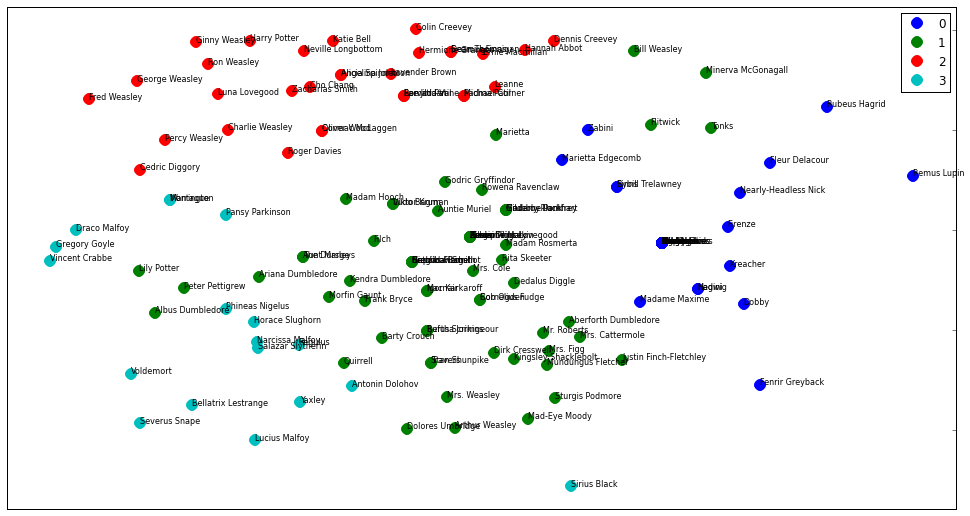

In [108]:
showClusterPlot(data)

In [109]:
def showDendrogram(dist, charClusts):
    # also taken almost verbatim from that tutorial, cite this guy a lot?

    linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

    fig, ax = plt.subplots(figsize=(15, 50)) # set size
    ax = dendrogram(linkage_matrix, orientation="right", labels=charClusts['characters']);

    plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')

    plt.tight_layout() #show plot with tight layout

    #uncomment below to save figure
    plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

C:\Users\Molly\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


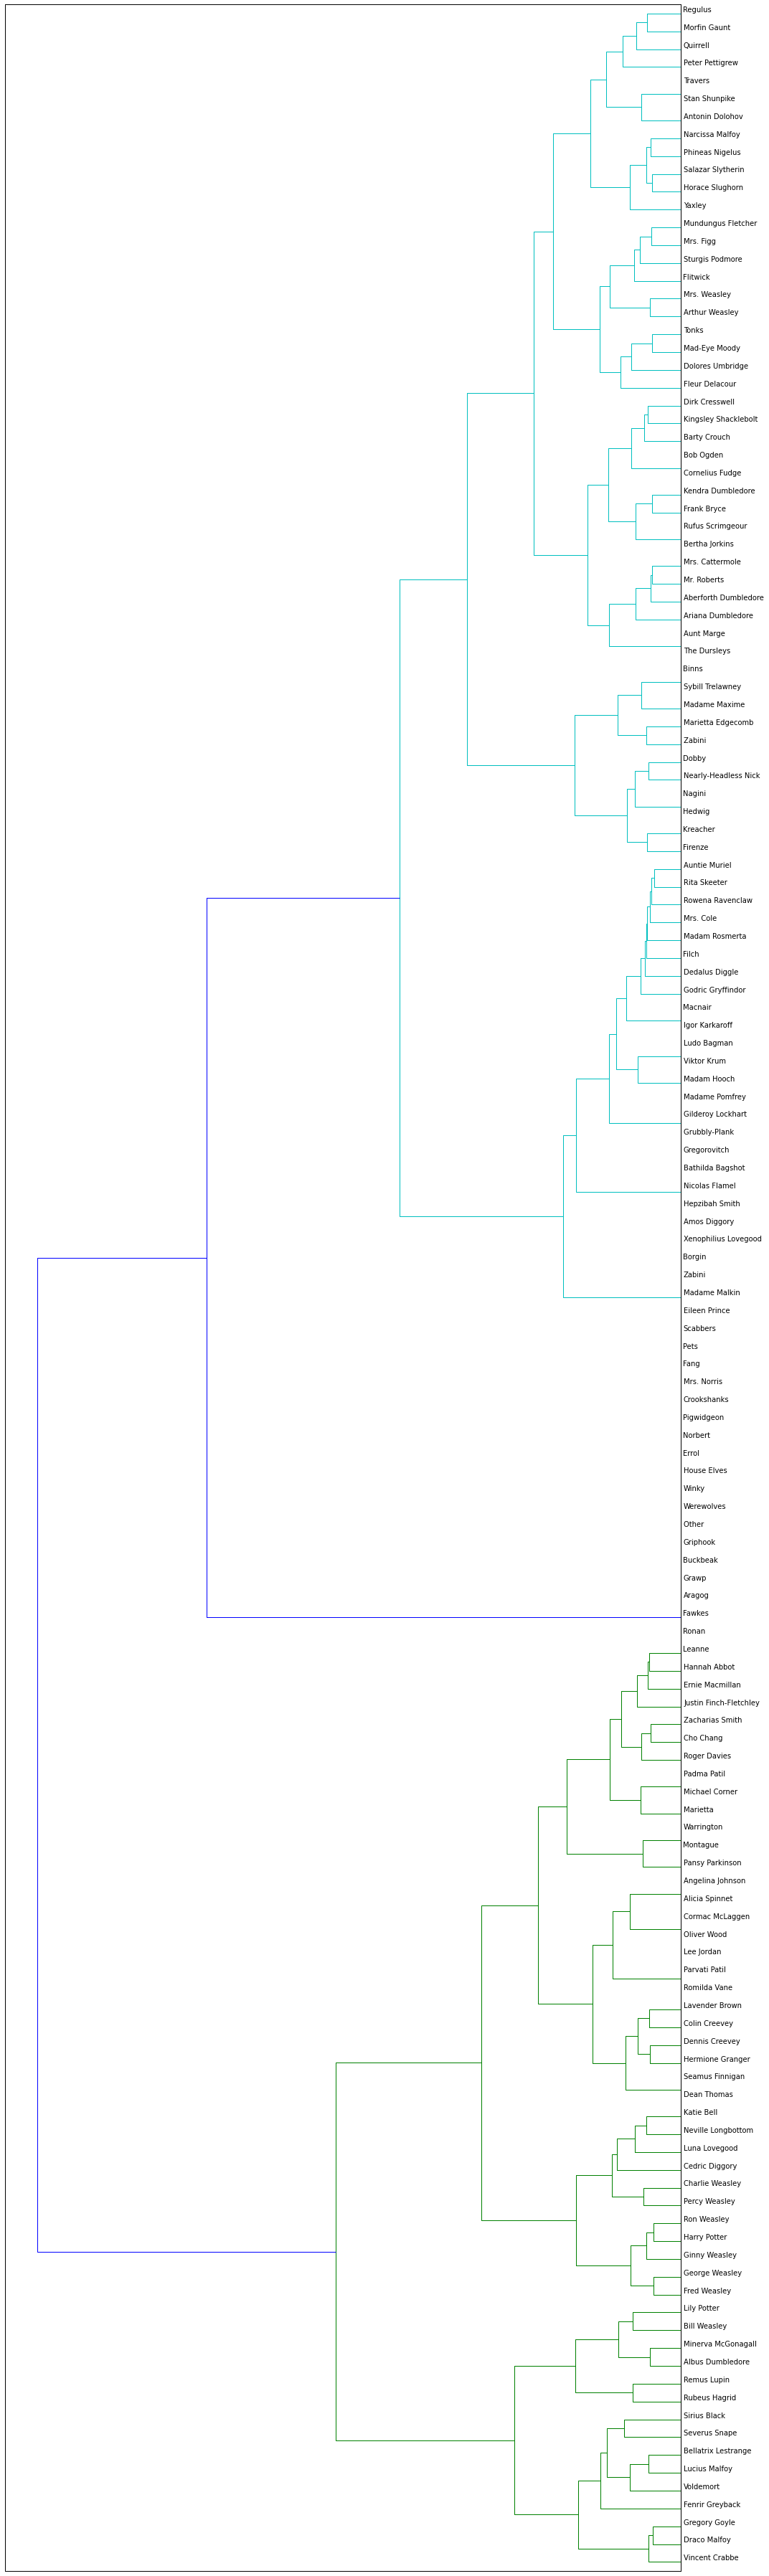

In [110]:
showDendrogram(pairwiseDist(data), charClusts)